# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [46]:
# Checking for missing values
missing_values = diabetes_df.isnull().sum()
print("Missing Values:")
print(missing_values) # Result displays no misiing value

# Summary statistics
diabetes_df.describe()

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


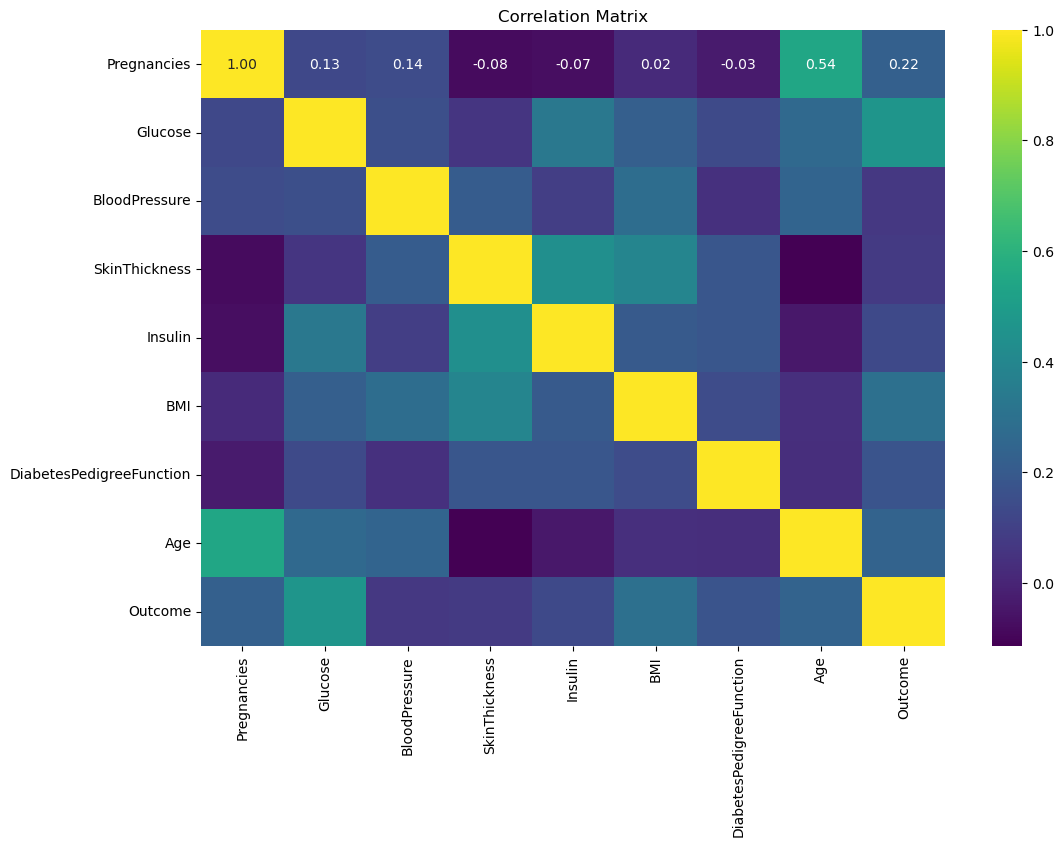

In [47]:
# Correlation matrix
correlation_matrix = diabetes_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

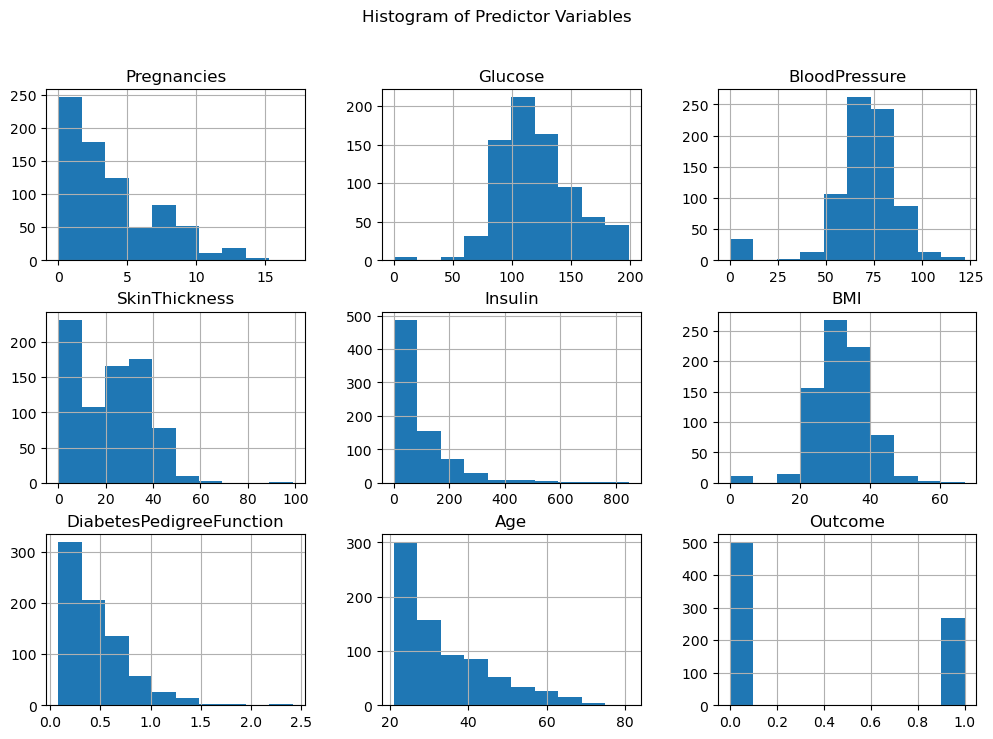

In [48]:
# Distribution of predictor variables
diabetes_df.hist(figsize=(12, 8))
plt.suptitle("Histogram of Predictor Variables")
plt.show()

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

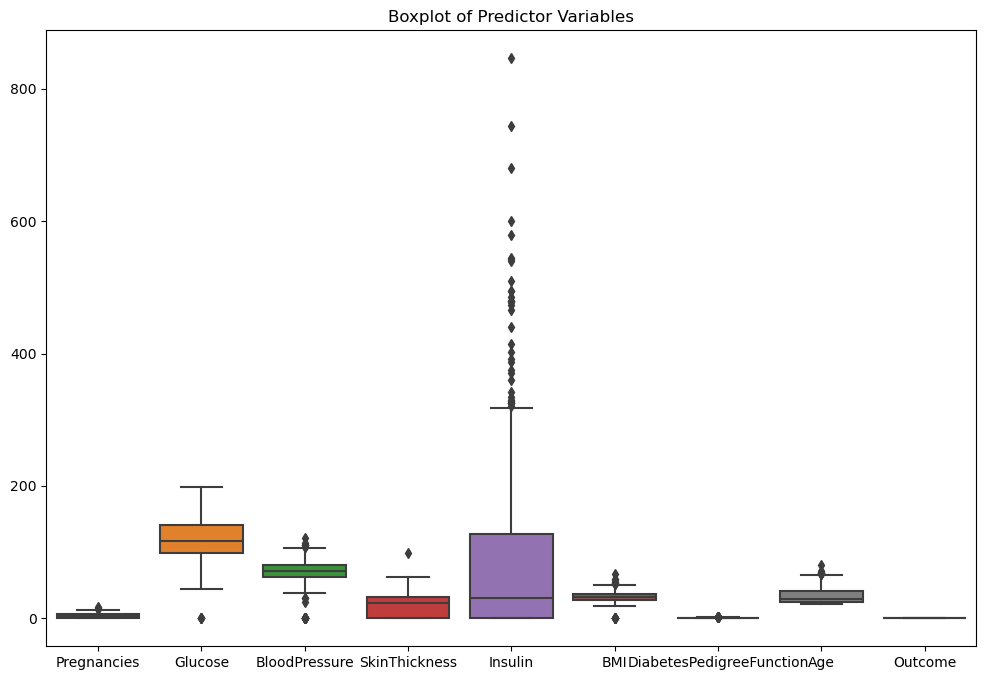

In [49]:
# Boxplot for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=diabetes_df)
plt.title("Boxplot of Predictor Variables")
plt.show()

In [50]:
# Average age
average_age = diabetes_df['Age'].mean()
print("Average Age:", average_age)

# Average glucose level for individuals with and without diabetes
average_glucose_diabetes = diabetes_df.groupby('Outcome')['Glucose'].mean()
print("Average Glucose Level for individuals with and without diabetes:")
print(average_glucose_diabetes)

# Average BMI for individuals with and without diabetes
average_bmi_diabetes = diabetes_df.groupby('Outcome')['BMI'].mean()
print("Average BMI for individuals with and without diabetes:")
print(average_bmi_diabetes)

# Average Age for individuals with and without diabetes
average_age_diabetes = diabetes_df.groupby('Outcome')['Age'].mean()
print("Average Age for individuals with and without diabetes:")
print(average_age_diabetes)

Average Age: 33.240885416666664
Average Glucose Level for individuals with and without diabetes:
Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
Average BMI for individuals with and without diabetes:
Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
Average Age for individuals with and without diabetes:
Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


In [59]:
# sns.pairplot(diabetes_df, hue='Outcome', palette='husl', diag_kind='kde')
# plt.suptitle("Pairplot of Predictor Variables with Outcome Hue")
# plt.show()


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

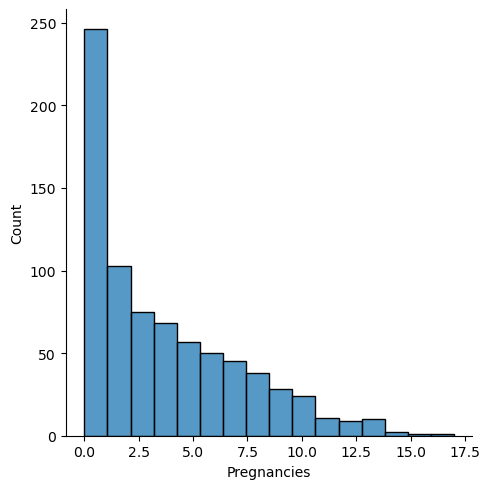

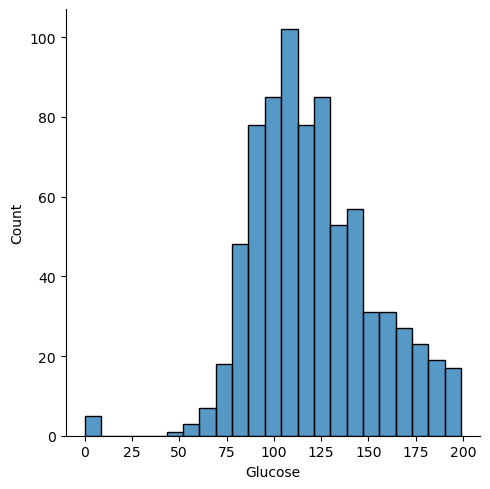

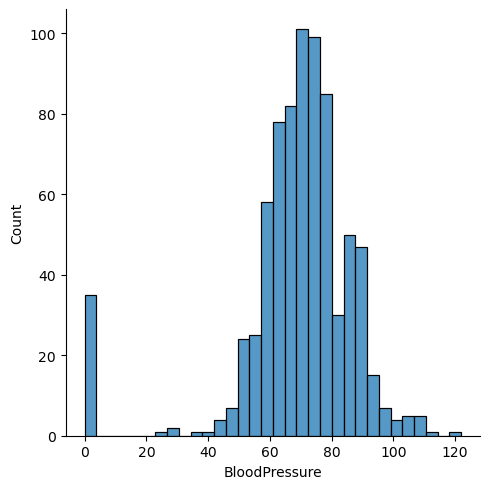

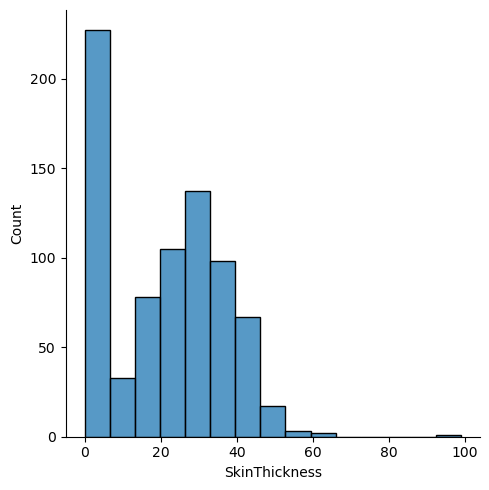

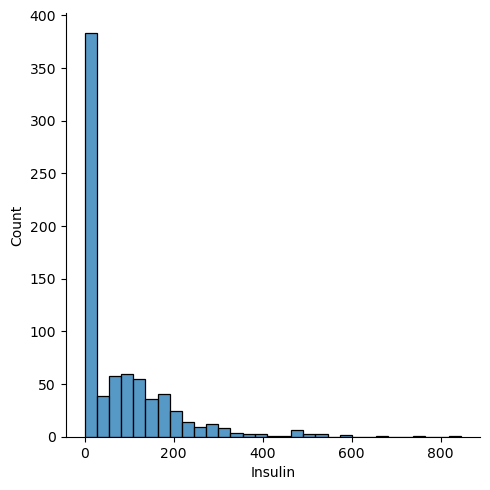

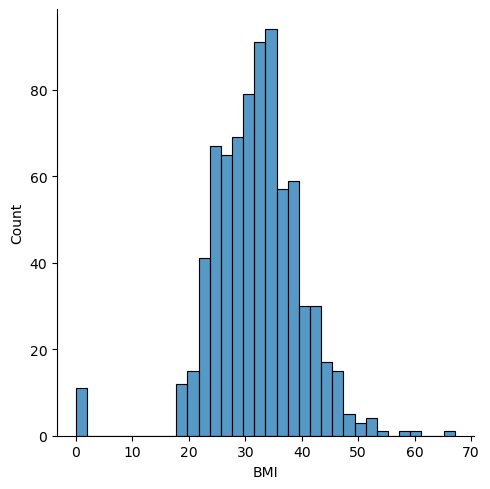

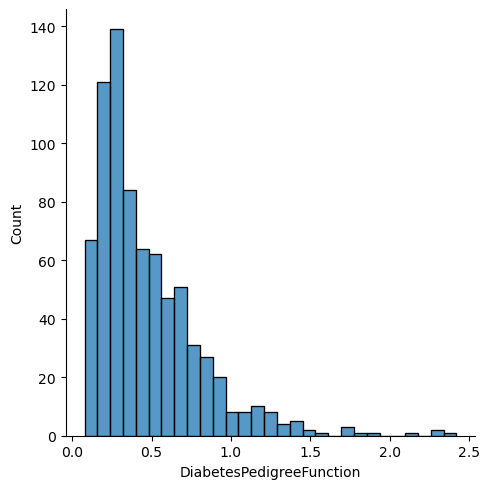

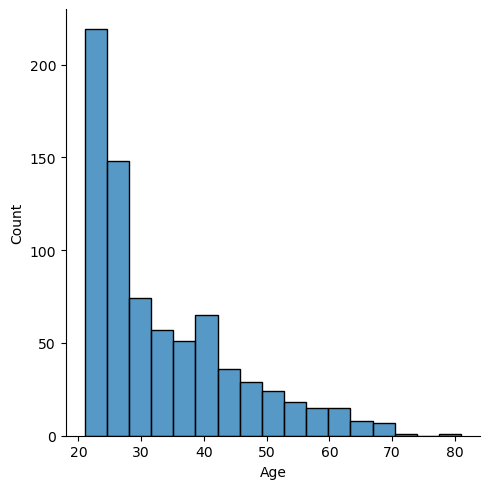

In [51]:
num_feats = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
num_feats
for column in num_feats:
    sns.displot(diabetes_df[column])

In [24]:


# # Log transformation of 'DiabetesPedigreeFunction' and 'BMI'
# diabetes_df['DiabetesPedigreeFunction_log'] = diabetes_df['DiabetesPedigreeFunction'].apply(np.log)
# diabetes_df['BMI_log'] = diabetes_df['BMI'].apply(np.log)

# # Plot the distributions after log transformation
# sns.displot(diabetes_df['DiabetesPedigreeFunction_log'], kde=True)
# sns.displot(diabetes_df['BMI_log'], kde=True)


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [52]:
#Handling Missing Data
#Some of the variables cannot have zero's such as bloodpressure, glucose, insulin, bmi and Skinthickness
from sklearn.impute import SimpleImputer

# Replace 0 values with NaN in relevant columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df[cols_with_zeros] = diabetes_df[cols_with_zeros].replace(0, np.nan)

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
diabetes_df[cols_with_zeros] = imputer.fit_transform(diabetes_df[cols_with_zeros])

# Summary statistics
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
#Checking for Imbalanced dataset
#diabetes_df[diabetes_df['Outcome'] == 0]

In [53]:
from scipy.stats.mstats import winsorize

# Handling Outliers
#diabetes_df[num_feats] = winsorize(diabetes_df[num_feats], limits=[0.05, 0.05])
for column in num_feats:
    diabetes_df[column] = winsorize(diabetes_df[column], limits=[0.05, 0.05])
diabetes_df.describe()

/Users/mac/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/mac/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/mac/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/mac/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/mac/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/mac/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.742188,121.668534,72.177320,28.972430,148.845098,32.334677,0.457349,32.951823,0.348958
std,3.123898,28.716642,10.443216,7.655793,55.889750,6.207881,0.277178,11.006885,0.476951
min,0.000000,80.000000,52.000000,14.000000,50.000000,22.200000,0.140000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,10.000000,181.000000,90.000000,44.000000,293.000000,44.500000,1.136000,58.000000,1.000000


In [54]:
from sklearn.preprocessing import StandardScaler

#Scaling and Normalization
scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(diabetes_df[num_feats]))

df_train_scaled.columns = num_feats
df_train_scaled

# for column in num_feats:
#     diabetes_df[column] = scaler.fit_transform(diabetes_df[column].values.reshape(-1, 1))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.723226,0.917539,-0.016990,0.787835,0.120013,0.203958,0.612465,1.549874
1,-0.878382,-1.277741,-0.591901,0.003604,0.120013,-0.924376,-0.383935,-0.177443
2,1.363869,2.067447,-0.783537,0.023656,0.120013,-1.456305,0.774922,-0.086532
3,-0.878382,-1.138358,-0.591901,-0.780627,-0.981948,-0.682590,-1.048202,-1.086557
4,-1.198703,0.534236,-1.933357,0.787835,0.342950,1.735268,2.450030,0.004380
...,...,...,...,...,...,...,...,...
763,2.004512,-0.720210,0.366283,1.964181,0.557798,0.091125,-1.033762,2.277166
764,-0.558060,0.011550,-0.208627,-0.257807,0.120013,0.719768,-0.423647,-0.541089
765,0.402904,-0.023296,-0.016990,-0.780627,-0.659676,-0.988852,-0.766611,-0.268354
766,-0.878382,0.150933,-1.166811,0.023656,0.120013,-0.360209,-0.391156,1.277140


In [55]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Handling Imbalanced Data using SMOTE
X = df_train_scaled
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Initializing the models
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Training the models on the resampled data
logistic_regression.fit(X_train_resampled, y_train_resampled)
random_forest.fit(X_train_resampled, y_train_resampled)

# Predictions on the testing set
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Evaluation Function 
def evaluate_model(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred)
  return accuracy, precision, recall, f1, roc_auc

# Logistic Regression Model Evaluation
accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr = evaluate_model(y_test, y_pred_lr)

# Random Forest Model Evaluation
accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf = evaluate_model(y_test, y_pred_rf)

print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
print("ROC-AUC:", roc_auc_lr)
print()

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("ROC-AUC:", roc_auc_rf)

Logistic Regression:
Accuracy: 0.7077922077922078
Precision: 0.5714285714285714
Recall: 0.7272727272727273
F1-score: 0.64
ROC-AUC: 0.7121212121212122

Random Forest:
Accuracy: 0.7467532467532467
Precision: 0.6176470588235294
Recall: 0.7636363636363637
F1-score: 0.6829268292682927
ROC-AUC: 0.7505050505050505


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

-  The original dataset underwent rigorous preprocessing to address issues such as missing values, imbalanced data, and outliers. Notably, outliers were observed in all predictor variables, with insulin having more prominent outliers.  Some of the variables had values of zero, which was impractical as a patient can not have 0 as their glucose level or a blood pressure of 0. These were all addressed during the Data Cleaning and Preprocessing


-  In terms of variable relationships, glucose and BMI emerged having the strongest relationship with the outcome variable (diabetes). Glucose exhibited a strong relationship with insulin levels and the outcome, while blood pressure correlated strongly with BMI and age. Additionally, skin thickness showed some relationship with BMI.


-   Model Performance: Random Forest Model generally performed better than the logistic regression Model. Both models achieved accuracy scores of around 70% to 75%, which indicates that they correctly predicted the outcome (diabetic or non-diabetic) for approximately 70% to 75% of the samples in the test set. However, the precision scores for both models are around 0.57 to 0.62, indicating that around 57% to 62% of the predicted diabetic cases were actually diabetic. Similarly, the recall scores for both models are around 0.72 to 0.76, indicating that around 72% to 76% of the actual diabetic cases were correctly identified by the model. Considering all of these together, the models exhibit moderate performance in predicting diabetes based on the given features. However, there is still  room for improvement through further variable exploration, optimization, feature engineering, understanding the relationships of the variables and exploring other modeling techniques.


-  Insights from the model reveal factors like glucose levels and BMI play significant roles in predicting diabetes. This information can guide future research and interventions, aiding healthcare professionals in assessing risks and managing patients effectively.